In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Q4
cov = 9852
std_x = np.sqrt(196)
std_y = np.sqrt(648025)
cor = cov/(std_x*std_y)
cor

0.8741792369121562

rho:	 [0.68616333 0.1946585  0.0922564  0.02692177]
cumsum:	 [0.68616333 0.88082182 0.97307823 1.        ]


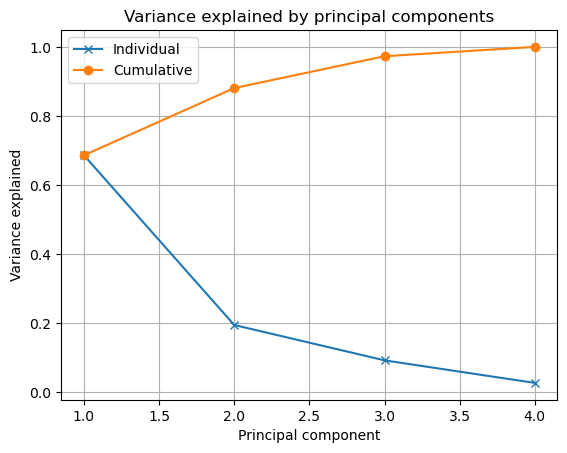

In [3]:
# S: sigma, not squared
S = np.array([30.19,16.08,11.07,5.98])

# rho: variance explained by each PC
rho = (S*S) / (S*S).sum()
print(f'rho:\t {rho}')

# cumulative sum
cumsum = np.cumsum(rho)
print(f'cumsum:\t {cumsum}')

plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [4]:
## Q7
x_til = np.array([-1,-1,-1,1])
x_til = np.reshape(x_til, (-1,1))

V = np.array([[0.45,-0.6,-0.64,0.15],
              [-0.4,-0.8,0.43,-0.16],
              [0.58,-0.01,0.24,-0.78],
              [0.55,-0.08,0.59,0.58]])

pc1 = x_til.T@V[:,0]
pc2 = x_til.T@V[:,1]
pc3 = x_til.T@V[:,2]
pc4 = x_til.T@V[:,3]
print(pc1,pc2,pc3,pc4)

[-0.08] [1.33] [0.56] [1.37]


In [5]:
## Q8
n = np.array([[114,0,32],
              [0,119,0],
              [8,0,60]])
N = 333

S = 0
for i in range(3):
    for j in range(3):
        temp = 0.5*n[i,j]*(n[i,j]-1)
        S += temp

temp = 0
for i in range(3):
    temp += 0.5*n[:,i].sum()*(n[:,i].sum()-1)
    temp += 0.5*n[i,:].sum()*(n[i,:].sum()-1)
D = 0.5*N*(N-1) - temp + S

rand = (S+D)/(0.5*N*(N-1))
rand

0.8740909584283079

In [6]:
## Q11
pp1 = 0.44
pp2 = 0.36
pp3 = 0.20

l1 = 0
l2 = 0.85
l3 = 0.16

prob = (l3*pp3)/(l1*pp1 + l2*pp2 + l3*pp3)
prob

0.09467455621301776

In [7]:
## Q12
K = 2
density_o2 = K/(75+125)
density_o3 = K/(75+51)
density_o10 = K/(51+125)

ard = density_o2*K/(density_o3 + density_o10)
ard

0.7343046357615894

In [8]:
## Q13
m2 = 2
m3 = 3
pairwise_o6 = 1025+925+1375
pairwise_o7 = 1100+1000+1450
(pairwise_o6+pairwise_o7)/(m2*m3)

1145.8333333333333

In [9]:
## Q15
p_male = 6/10
p_female = 4/10

numerator = (3/6)*(4/6)*(3/6)*p_male
denom = (2/4)*(4/4)*(2/4)*p_female + numerator

prob = numerator/denom
prob

0.49999999999999994

In [10]:
## Q18
I_parent = 1 - 146/333
I_left = 1 - 146/(146+119)
I_right = 1 - 68/68

pg = I_parent - (146+119)/333*I_left - 68/333*I_right
pg

0.20420420420420415

In [11]:
print(68/333,68/265,265/333)

0.2042042042042042 0.25660377358490566 0.7957957957957958


In [12]:
## Q19
w1 = 1/7
e = 1/7
alpha = 0.5*np.log((1-e)/e)
w_correct = w1*np.exp(-alpha)/(6*w1*np.exp(-alpha) + w1*np.exp(alpha))
w_correct

0.08333333333333331

In [13]:
## Q21
# w = [423.49, 48.16]
# w = [0, -46.21]
# w = [0, -27.89]
w = [418.94, -26.12]

x = 14
y = 1/(1+np.exp(-w[0]-x*w[1]))
print(y)

x = 20
y = 1/(1+np.exp(-w[0]-x*w[1]))
print(y)

1.0
1.1692110261658423e-45


In [14]:
## Q22
from scipy.stats import norm

mm1 = norm.pdf(15.38, 18.347, 1.2193)
mm2 = norm.pdf(15.38, 14.997,0.986)
mm3 = norm.pdf(15.38, 18.421,1.1354)
w1 = 0.13
w2 = 0.55
w3 = 0.32

prob = mm2*w2/(mm1*w1 + mm2*w2 + mm3*w3)
prob

0.974887415657141

In [15]:
## Q23
import scipy

n12 = 8+15+5
n21 = 7+11+17
p = 2*scipy.stats.binom.cdf(min([n12,n21]), n=n12+n21, p=0.5)

In [16]:
## Q24

def draw_ROC_curve(y_hat,y_true):
    """
    Input: y_true values estimated from a 1-dimension observation,
           y_hat values based on class membership
    Output: Jaccard similarity and Rand index.
    """
    
    import matplotlib.pyplot as plt
    
    if len(y_hat)!=len(y_true):
        raise ValueError("y_hat and y_true have different array lengths")
        
    n = len(y_hat)
    n_positive = y_true.count(1)
    n_negative = y_true.count(0)
    print(f'n_positive: {n_positive}, n_negative: {n_negative}')
    
    TPR = [1]
    FPR = [1]
    for i in range(n):
        TP = 0
        FP = 0
        threshold = y_hat[i]
        for j in range(n):
            if y_hat[j] > threshold and y_true[j]==0:
                FP+=1
            if y_hat[j] > threshold and y_true[j]==1:
                TP+=1
        TPR.append(TP/n_positive)
        FPR.append(FP/n_negative)
        
    plt.plot(FPR,TPR)
    plt.grid()
    plt.axis('square')
    plt.show()

n_positive: 4, n_negative: 3


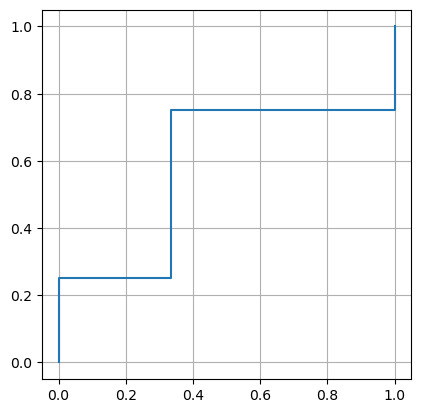

In [17]:
import numpy as np

y_hat = [0.01,0.05,0.14,0.3,0.31,0.36,0.91]   
y_true = [1,0,0,1,1,0,1]

draw_ROC_curve(y_hat,y_true)

In [18]:
## Q25
M = 4
N = 6
C = 3
(M+1)*N + N*C + C

51

In [19]:
## Q26
num = 0.97*0.01
denom = 0.97*0.01 + 0.03*0.99
prob = num/denom
prob

0.24619289340101524

In [20]:
## Q27
n = 221*2*4      # 1768, from inner fold
n = n+2          # retrain on parameterisation set
n

1770